# Recap

This is the terminal:
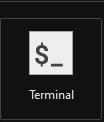

## Use Google! Use --help!

**And use Ctrl-C Ctrl-V!**

Navigation & files: `cd `, `ls`, `less`, `cat`, `wc`, `cp`, `mv`, `rm`

Piping & streams: `|` `>` 

Subsetting: `grep "pattern" file`, `cut -f1-2 -d " " file`, `awk 'pattern {subset}'` - complex subsetting

Patterns: `==`, `>=`, `&&`

Wildcard: `*`

Regular expressions: `[abcd]`, `A|B`, `^`

Compressed files: `*.gz`, `*.tar.gz`

Scrolling.

**Any questions?**



# Reference genomes & raw sequencing data 

We know what a reference genome is. The file format is called fasta, usually with the extension `.fa`, and plain text (or compressed with `.gz`).

This file is nothing but a string of letters, representing a sequence (e.g. a genome of ~3.5 Gbp). Too big to download individually, hence we can use it in one directory.

```
cd /home/local/ANTHROPOLOGY/kuhlwilmm83/refgen

less /home/local/ANTHROPOLOGY/kuhlwilmm83/refgen/hg19/hg19.p13.plusMT.no_alt_analysis_set.fa.gz
```

We should do some inspections here!

*Now, let's get some data!* Fastq files contain the raw sequencing data. Here is a link with a samll example data set.

`wget https://ucloud.univie.ac.at/index.php/s/BDxyMZaGyKedssT/download`

`tar -zxvf download`

`less test.fastq.gz`

So, you see here:

Header: read id, sequence info, read pair

Sequence: ATGCGCGTATCGATGCTATGC… bla bla

Qualities: confidence for each base called (ASCII)

**What do we do now?**

* Count the number of reads, or lines in the fasta file. How do they relate?

* Look at the start and end of the file.

* Get the unique reads

* Search for patterns. E.g. "CGTATGCCGTCTTCTGCTTG" - what is going on? And why does it matter?


# Adapter trimming

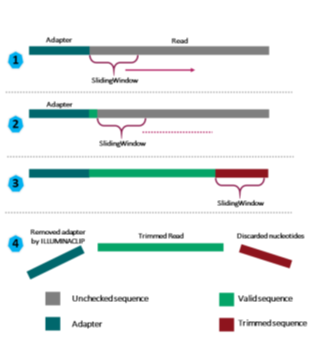

For trimming, we use a tool called `trimmomatic`. This is a tool implemented in a language called `java`, and we will not check how this looks like. On the good side, it is a command line tool, so you can used it the same way as you do with `grep` or other basic commands, providing parameters, and directions from where to take input and where to write output.

```
java -jar /opt/trimmomatic.jar SE -phred33 test.fastq.gz \
test_p.fastq.gz \
ILLUMINACLIP:/home/local/ANTHROPOLOGY/kuhlwilmm83/refgen/adapters/TruSeq2-SE.fa:2:30:10 LEADING:3 TRAILING:3 SLIDINGWINDOW:4:15 MINLEN:36
``` 

* Let's count the reads before and after this step!

Now we have performed the first important step in raw data filtering, congrats!


# FASTQC

Before moving on, let's have quick check on the raw data quality! In order to do that, we can use a program called FastQC. It is already installed on the cluster, and we can run it easily:

``` 
mkdir /fastqc-output
/opt/FastQC/fastqc -o ./fastqc-output test.fastq.gz
```

This will create a report on data quality in `html` format, which we can inspect.

Now we have made sure the data looks good.

## Next time: mapping to the reference genome